In [0]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

In [2]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 70 Mar 19 21:00 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# List available datasets.
!kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
ronitf/heart-disease-uci                                     Heart Disease UCI                                     3KB  2018-06-25 11:33:56          17518  
karangadiya/fifa19                                           FIFA 19 complete player dataset                       2MB  2018-12-21 03:52:59          15205  
russellyates88/suicide-rates-overview-1985-to-2016           Suicide Rates Overview 1985 to 2016                 396KB  2018-12-01 19:18:25          13016  
iarunava/cell-images-for-detecting-malaria                   Malaria Cell Images Dataset                         337MB  2018-12-05 05:40:21           2962  
lava18/google-play-store-apps                             

In [11]:
# Copy the fake news data set locally.
!kaggle datasets download -d jruvika/fake-news-detection

100% 4.89M/4.89M [00:00<00:00, 19.2MB/s]



In [12]:
# Unzip the data
!unzip fake-news-detection.zip

Archive:  fake-news-detection.zip
  inflating: data.h5                 
  inflating: data.csv                


In [13]:
# Use this command to view your files
!ls

amazon-fine-food-reviews.zip  data.h5		       kaggle.json
data.csv		      fake-news-detection.zip  sample_data


In [49]:
#Import necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

#For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For text processing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

#Regex
import re

#Feature selection
from sklearn.feature_extraction.text import TfidfVectorizer

#For classification
from sklearn.ensemble import RandomForestClassifier

#For evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import roc_auc_score

#Save and load model
import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
#Read the csv file
df = pd.read_csv('data.csv')

In [16]:
#View the first 10 instances
df.head(10)

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
5,http://beforeitsnews.com/sports/2017/09/jetnat...,JetNation FanDuel League; Week 4,JetNation FanDuel League; Week 4\n% of readers...,0
6,https://www.nytimes.com/2017/10/10/us/politics...,Kansas Tried a Tax Plan Similar to Trump’s. It...,"In 2012, Kansas lawmakers, led by Gov. Sam Bro...",1
7,https://www.reuters.com/article/us-india-cenba...,"India RBI chief: growth important, but not at ...",The Reserve Bank of India (RBI) Governor Urjit...,1
8,https://www.reuters.com/article/us-climatechan...,EPA chief to sign rule on Clean Power Plan exi...,"Scott Pruitt, Administrator of the U.S. Enviro...",1
9,https://www.reuters.com/article/us-air-berlin-...,Talks on sale of Air Berlin planes to easyJet ...,FILE PHOTO - An Air Berlin sign is seen at an ...,1


In [18]:
#Check dimensions of dataset
df.shape

(4009, 4)

In [19]:
#Get a quick description
df.describe()

,Label
count,4009.000000
mean,0.466949
std,0.498969
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [20]:
#Know the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
URLs        4009 non-null object
Headline    4009 non-null object
Body        3988 non-null object
Label       4009 non-null int64
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


In [0]:
#Drop rows with missing values
df.dropna(inplace=True)

In [22]:
#Check the change in number of rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3988 entries, 0 to 4008
Data columns (total 4 columns):
URLs        3988 non-null object
Headline    3988 non-null object
Body        3988 non-null object
Label       3988 non-null int64
dtypes: int64(1), object(3)
memory usage: 155.8+ KB


Text(0, 0.5, 'Frequency')

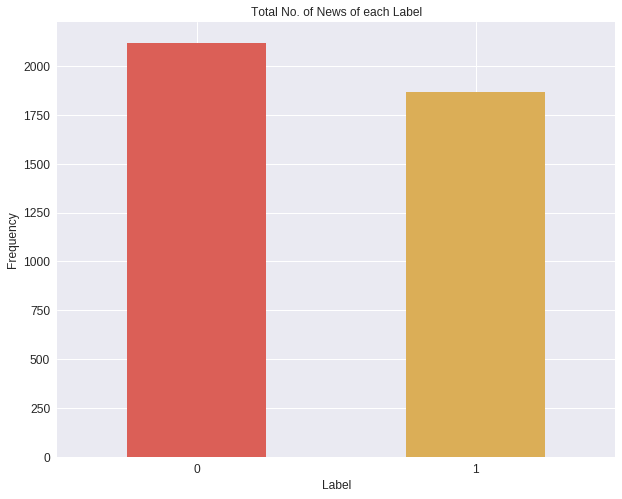

In [23]:
#Plot the number of news each type: fake and real
colors=sns.color_palette("hls", 10) 
pd.Series(df["Label"]).value_counts().plot(kind = "bar",color=colors,figsize=(10,8),fontsize=12,rot = 0, title = "Total No. of News of each Label")
plt.xlabel('Label', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

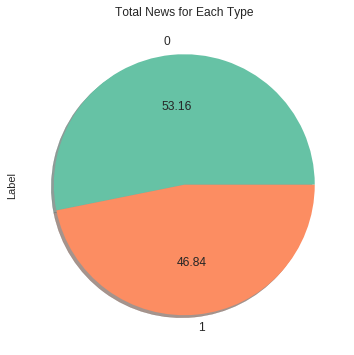

In [28]:
#Create a pie chart
colors=sns.color_palette("Set2", 10)
pd.Series(df["Label"]).value_counts().plot(kind="pie",colors=colors,labels=["0", "1"],shadow=True,autopct='%.2f', fontsize=12,figsize=(6, 6),title = "Total News for Each Type")

In [0]:
#Visualization using wordcloud 
def wcloud(val):
    """
    This function takes input a binary integer value 0 or 1
    and returns the respective word cloud for the associated sentiment.
    """
    df1=df[df['Label']==val]
    words = ' '.join(df1['Body'])
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=2000, height=1500).generate(cleaned_word)
    plt.figure(1,figsize=(15, 15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

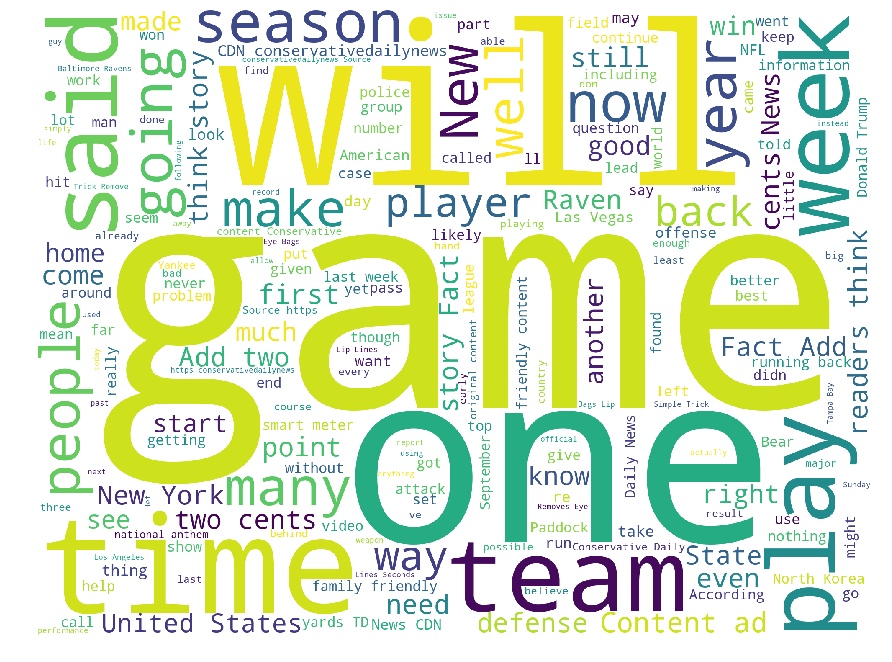

In [31]:
wcloud(0) #Reliable news 

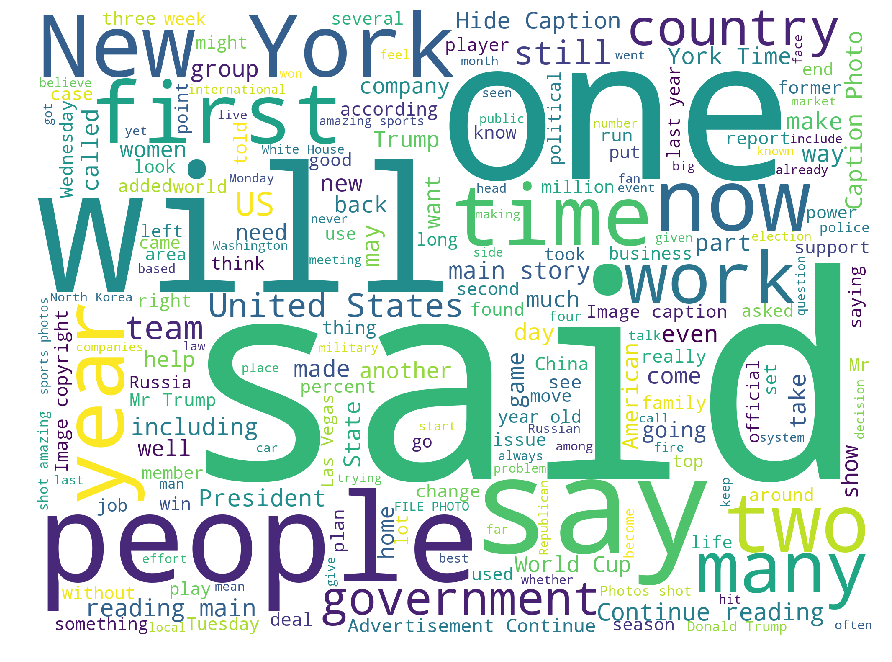

In [32]:
wcloud(1) #Unreliable news

In [0]:
#Preprocess the text
def text_to_words(raw_text):
    letters = re.sub("[^a-zA-Z]", " ",raw_text) #Grab letters
    words = letters.lower().split() #Lowercase                             
    stops = set(stopwords.words("english")) #Get unique stopwords                  
    meaningful_words = [w for w in words if not w in stops] 
    return ( " ".join( meaningful_words ))

In [0]:
#Append new column
df['clean_text']=df['Body'].apply(lambda x: text_to_words(x))

In [0]:
#Split the data into two sets namely the train and test set
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['Label'], test_size=0.33, random_state=0)

In [39]:
#Create the transform
vectorizer = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  

#Encode document
X_train_vector = vectorizer.fit_transform(X_train).toarray()
X_test_vector = vectorizer.transform(X_test).toarray()

#Summarize encoded vector
print("The shape of X_train_vector is: ", X_train_vector.shape)
print("The shape of X_test_vector is: ", X_test_vector.shape)

The shape of X_train_vector is:  (2671, 2000)
The shape of X_test_vector is:  (1317, 2000)


In [40]:
#Fit the classifier to the training set
classifier = RandomForestClassifier(n_estimators=50, random_state=0)  
classifier.fit(X_train_vector, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [0]:
#Predict using test set
y_pred = classifier.predict(X_test_vector)

In [42]:
print(confusion_matrix(y_test,y_pred))

[[681  33]
 [  0 603]]


In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       714
           1       0.95      1.00      0.97       603

   micro avg       0.97      0.97      0.97      1317
   macro avg       0.97      0.98      0.97      1317
weighted avg       0.98      0.97      0.97      1317



In [44]:
print(accuracy_score(y_test, y_pred))

0.9749430523917996


In [0]:
#Save the model as a pickle object in Python
with open('rforest_classifier', 'wb') as picklefile:  
    pickle.dump(classifier,picklefile)

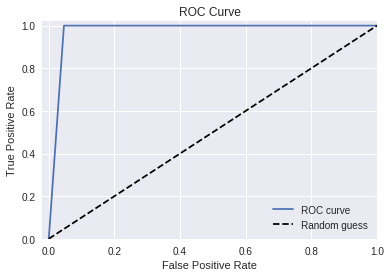

In [47]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
#Create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

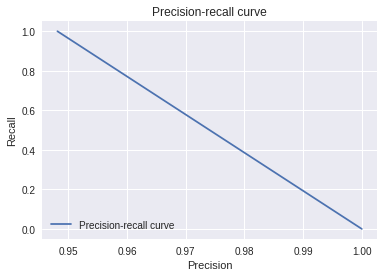

In [48]:
#Precision vs Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
#Create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

In [50]:
#Check the roc_auc_score
roc_auc_score(y_test, y_pred)

0.976890756302521